<a href="https://colab.research.google.com/github/gxrhariagasthya/MACHINE_LEARNIG_REPOs/blob/newuploads/Diabetics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
!ls

drive  sample_data


In [15]:
import os

# List contents of the root of Google Drive
root_dir = '/content/drive/My Drive/Machine_learning/Diabetics_prediction/'
os.listdir(root_dir)

['Diabetics_prediction.ipynb',
 'diabetes.ipynb',
 'pima-indians-diabetes (1).csv',
 'diabetes.csv']

In [16]:
data_set=os.path.join(root_dir, 'diabetes.csv')
diabetes_dataset = pd.read_csv(data_set)

In [17]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [19]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
outcome_counts=diabetes_dataset['Outcome'].value_counts()

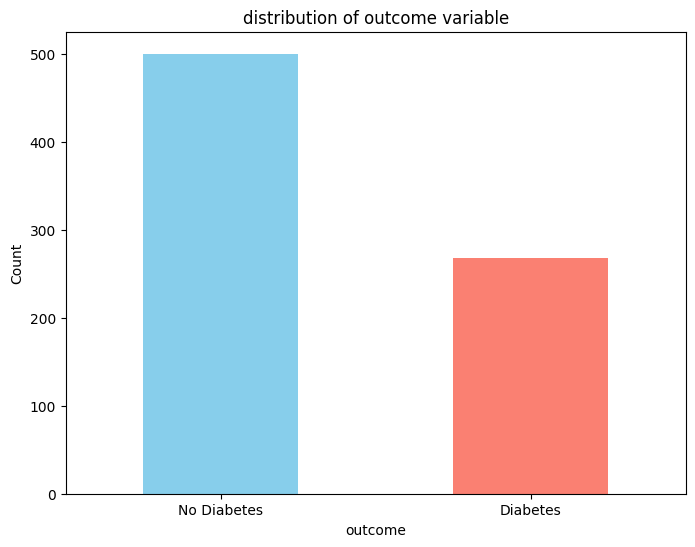

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
outcome_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.xlabel('outcome')
plt.ylabel('Count')
plt.title('distribution of outcome variable')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

In [28]:
mean_values=diabetes_dataset.groupby('Outcome').mean()
mean_values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variab

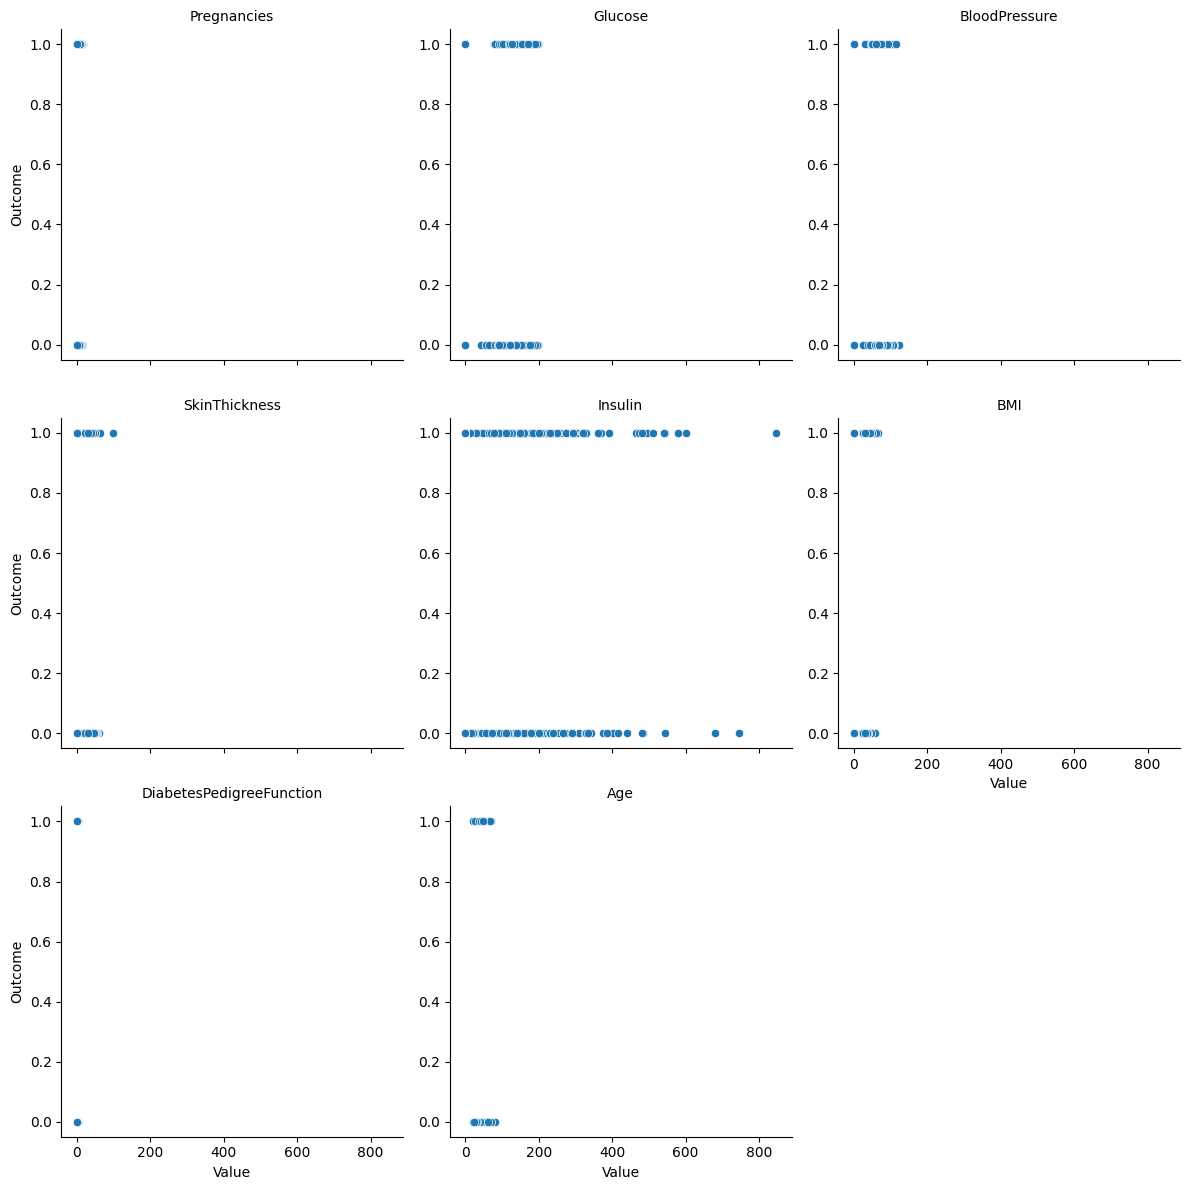

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for FacetGrid
df_plot = diabetes_dataset.melt(id_vars='Outcome', value_vars=independent_vars, var_name='Feature', value_name='Value')

# Create a FacetGrid
g = sns.FacetGrid(df_plot, col='Feature', col_wrap=3, height=4, sharey=False)

# Map scatter plots onto the grid
g.map_dataframe(sns.scatterplot, x='Value', y='Outcome', palette='viridis')

# Set axis labels and titles
g.set_axis_labels('Value', 'Outcome')
g.set_titles(col_template='{col_name}')
plt.show()


In [34]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [37]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

In [38]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [39]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [41]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [44]:
classifier = svm.SVC(kernel='linear')

In [45]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [46]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

<ipython-input-54-84394cb40db2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette="viridis")


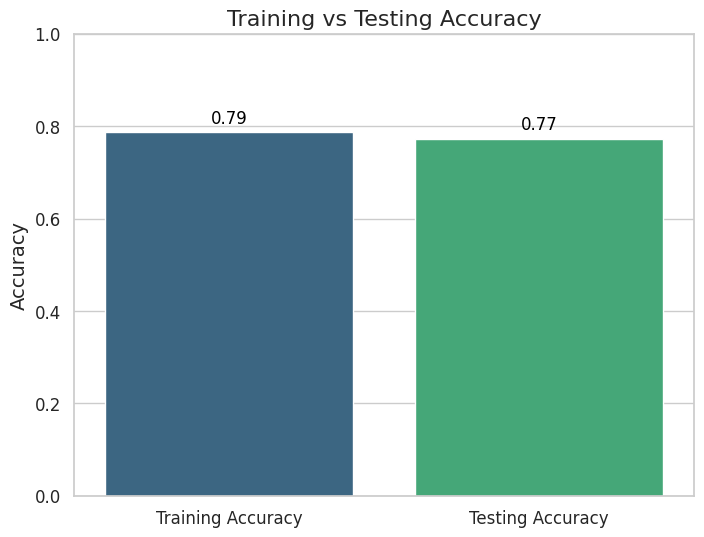

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
accuracies = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies, palette="viridis")

# Customize the plot
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training vs Testing Accuracy', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12, color='black')

# Show the plot
plt.show()


In [47]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [48]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [50]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(f"the imput data array{input_data}")
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(f"the imput data reshaped{input_data_reshaped}")
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

the imput data array(5, 166, 72, 19, 175, 25.8, 0.587, 51)
the imput data reshaped[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]]
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
